# Decision trees

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
X = iris['data'][:,2:]
y = iris['target']

In [9]:
X.shape

(150, 2)

In [10]:
y.shape

(150,)

In [11]:
dec_tree_clf = DecisionTreeClassifier(max_depth=2)
dec_tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
export_graphviz(dec_tree_clf,out_file='iris_tree.dot',feature_names=iris['feature_names'][2:],rounded=True,filled=True)

### Gini impurity

$$G_i=1-\sum_{k=1}^np_{i,k}^2$$

### Entropy

$$H_i=-\sum_{k=1}^np_{i,k}log_2(p_i,k)$$

Decision trees are white box models as their outputs can be easily interpreted as opposed to random forests or neural networks.

In [16]:
dec_tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [17]:
dec_tree_clf.predict([[5,1.5]])

array([1])

### Cart cost function for classification

$$J(k,t_k)=\frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$$

where 
$G_{left/right}$ measures the impurity of the left/rigth subset
$m_{left/right}$ is the number of instances in the left/right subset

The algorithm first splits the training set in two subsets using a single feature k and a thres‐
hold tk (e.g., “petal length ≤ 2.45 cm”). How does it choose k and tk? It searches for the
pair (k, tk) that produces the purest subsets (weighted by their size). The cost function
that the algorithm tries to minimize is given above. Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity.

## Regression trees

In [2]:
np.random.seed(42)
m=200
X = np.random.rand(m,1)
y = 4*(X-0.5)**2
y = y+np.random.randn(m,1)/10

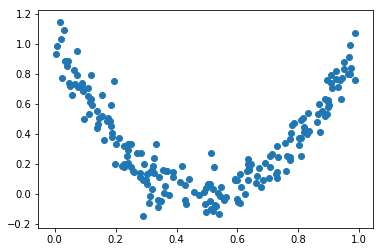

In [5]:
plt.scatter(X,y)
plt.show()

#### Regression tree with depth 2

In [7]:
dec_tree_reg = DecisionTreeRegressor(max_depth=2,random_state=42)
dec_tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [15]:
x1 = np.linspace(0,1,500).reshape(-1,1)
y_pred = dec_tree_reg.predict(x1)

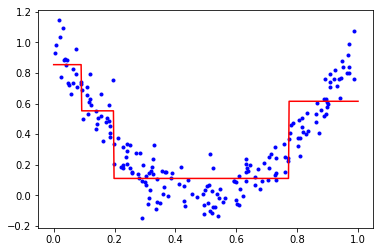

In [16]:
plt.plot(X,y,'b.')
plt.plot(x1,y_pred,'r-')
plt.show()

#### Regression tree with depth 3

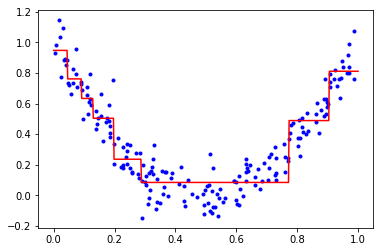

In [17]:
dec_tree_reg = DecisionTreeRegressor(max_depth=3,random_state=42)
dec_tree_reg.fit(X,y)

x1 = np.linspace(0,1,500).reshape(-1,1)
y_pred = dec_tree_reg.predict(x1)

plt.plot(X,y,'b.')
plt.plot(x1,y_pred,'r-')
plt.show()